### Importing Libraries

In [62]:
import numpy as np
import pandas as pd
import time
import warnings
from sklearn import metrics, preprocessing, tree
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.linear_model import SGDRegressor
from sklearn.feature_selection import VarianceThreshold

from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score




### Loading data

In [2]:
subjects = ['Physics', 'Chemistry', 'ComputerScience', 'Hindi', 'Biology', 'PhysicalEducation', 'Economics', 'Accountancy', 'BusinessStudies', 'English', 'Mathematics']



In [3]:
train = []
with open(r'C:\Users\Ananta Arora\Documents\data\Spectral\Spectral_Tech_AI_Data_Science_Hiring_Round\Problem_1_Dataset\training.json') as file:
    line = file.readline()
#     print(line)
    for i  in file.readlines():
        data = json.loads(i)
#         print(data)
        for sub in subjects:
            if sub not in data:
                data[sub] = 0
        train.append(data)
                
        

    


In [4]:
train

[{'Physics': 8,
  'Chemistry': 7,
  'PhysicalEducation': 3,
  'English': 4,
  'Mathematics': 6,
  'serial': 195490,
  'ComputerScience': 0,
  'Hindi': 0,
  'Biology': 0,
  'Economics': 0,
  'Accountancy': 0,
  'BusinessStudies': 0},
 {'Physics': 1,
  'Chemistry': 1,
  'PhysicalEducation': 1,
  'English': 3,
  'Mathematics': 3,
  'serial': 190869,
  'ComputerScience': 0,
  'Hindi': 0,
  'Biology': 0,
  'Economics': 0,
  'Accountancy': 0,
  'BusinessStudies': 0},
 {'Physics': 1,
  'Chemistry': 2,
  'PhysicalEducation': 2,
  'English': 1,
  'Mathematics': 2,
  'serial': 3111,
  'ComputerScience': 0,
  'Hindi': 0,
  'Biology': 0,
  'Economics': 0,
  'Accountancy': 0,
  'BusinessStudies': 0},
 {'Physics': 8,
  'Chemistry': 7,
  'PhysicalEducation': 6,
  'English': 7,
  'Mathematics': 7,
  'serial': 47738,
  'ComputerScience': 0,
  'Hindi': 0,
  'Biology': 0,
  'Economics': 0,
  'Accountancy': 0,
  'BusinessStudies': 0},
 {'Physics': 1,
  'Chemistry': 1,
  'PhysicalEducation': 1,
  'English'

In [5]:
x = pd.DataFrame(train, columns = subjects)
y = x["Mathematics"]

In [6]:
x.describe()

,Physics,Chemistry,ComputerScience,Hindi,Biology,PhysicalEducation,Economics,Accountancy,BusinessStudies,English,Mathematics
count,79465.000000,79465.000000,79465.000000,79465.0,79465.000000,79465.000000,79465.000000,79465.000000,79465.000000,79465.000000,79465.000000
mean,3.303505,3.299729,0.903417,0.0,0.672699,1.299151,0.436003,0.446033,0.490115,3.072044,4.247858
std,2.515786,2.478451,1.939964,0.0,1.664434,1.985667,1.188835,1.220168,1.350472,1.796456,2.357411
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
50%,3.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000
75%,5.000000,5.000000,0.000000,0.0,0.000000,2.000000,0.000000,0.000000,0.000000,4.000000,6.000000
max,8.000000,8.000000,8.000000,0.0,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [7]:
y.isnull().any()

False

In [8]:
x.isnull().any()

Physics              False
Chemistry            False
ComputerScience      False
Hindi                False
Biology              False
PhysicalEducation    False
Economics            False
Accountancy          False
BusinessStudies      False
English              False
Mathematics          False
dtype: bool

In [9]:
c = x.corr()
c

,Physics,Chemistry,ComputerScience,Hindi,Biology,PhysicalEducation,Economics,Accountancy,BusinessStudies,English,Mathematics
Physics,1.000000,0.840691,0.197819,NaN,0.186064,0.400833,-0.451116,-0.479600,-0.476254,0.390902,0.500853
Chemistry,0.840691,1.000000,0.222957,NaN,0.190633,0.387115,-0.456656,-0.486363,-0.482962,0.354040,0.501467
ComputerScience,0.197819,0.222957,1.000000,NaN,-0.187716,-0.286875,-0.169788,-0.166332,-0.165306,0.033610,0.097367
Hindi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Biology,0.186064,0.190633,-0.187716,NaN,1.000000,-0.252049,-0.148227,-0.147743,-0.146680,-0.019773,0.128900
PhysicalEducation,0.400833,0.387115,-0.286875,NaN,-0.252049,1.000000,-0.220906,-0.187988,-0.195950,0.365254,0.229236
Economics,-0.451116,-0.456656,-0.169788,NaN,-0.148227,-0.220906,1.000000,0.823781,0.800056,0.069370,0.162837
Accountancy,-0.479600,-0.486363,-0.166332,NaN,-0.147743,-0.187988,0.823781,1.000000,0.861650,0.085361,0.189878
BusinessStudies,-0.476254,-0.482962,-0.165306,NaN,-0.146680,-0.195950,0.800056,0.861650,1.000000,0.104091,0.167559
English,0.390902,0.354040,0.033610,NaN,-0.019773,0.365254,0.069370,0.085361,0.104091,1.000000,0.427342


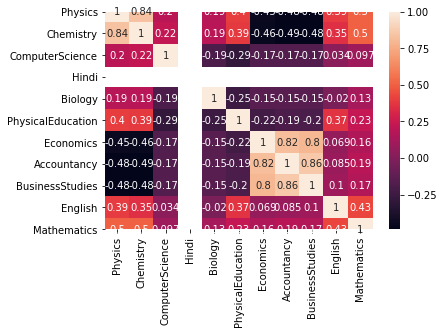

In [10]:
sns.heatmap(c,annot =True)

In [11]:
correlated_features = set()
correlation_matrix = x.drop('Mathematics', axis =1).corr()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.4:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

correlated_features

{'Accountancy',
 'BusinessStudies',
 'Chemistry',
 'Economics',
 'PhysicalEducation'}

In [12]:
x[['Accountancy','BusinessStudies','Chemistry','Economics','PhysicalEducation']].corr()

,Accountancy,BusinessStudies,Chemistry,Economics,PhysicalEducation
Accountancy,1.000000,0.861650,-0.486363,0.823781,-0.187988
BusinessStudies,0.861650,1.000000,-0.482962,0.800056,-0.195950
Chemistry,-0.486363,-0.482962,1.000000,-0.456656,0.387115
Economics,0.823781,0.800056,-0.456656,1.000000,-0.220906
PhysicalEducation,-0.187988,-0.195950,0.387115,-0.220906,1.000000


#### Negative linear relationship

(0, 8.637915737767042)

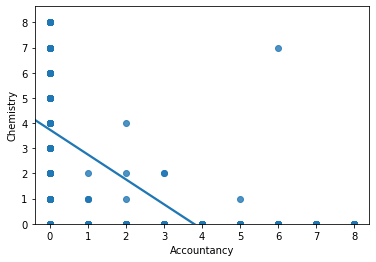

In [13]:
sns.regplot(x="Accountancy",y = "Chemistry",data=x)
plt.ylim(0,)

#### Positive Linear Relationship

(0, 8.598261805496703)

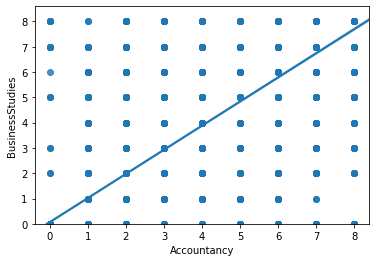

In [14]:
sns.regplot(x="Accountancy",y = "BusinessStudies",data=x)
plt.ylim(0,)

#### Observations
-  Most correlated features are Accountancy, BusinessStudies, Chemistry,Economics andPhysicalEducation

In [15]:
x.head()

,Physics,Chemistry,ComputerScience,Hindi,Biology,PhysicalEducation,Economics,Accountancy,BusinessStudies,English,Mathematics
0,8,7,0,0,0,3,0,0,0,4,6
1,1,1,0,0,0,1,0,0,0,3,3
2,1,2,0,0,0,2,0,0,0,1,2
3,8,7,0,0,0,6,0,0,0,7,7
4,1,1,0,0,0,1,0,0,0,3,2


#### Lets remove Mathematics column from the dataframe

In [16]:
x.drop("Mathematics", axis = 1, inplace = True)

In [17]:
# feature selection
selector = VarianceThreshold()
x_train = selector.fit_transform(x)

In [18]:
x_train.shape

(79465, 9)

In [19]:
## Generating Test data
# ## n = int(input())
# test = []

# for i in range(n):
#     s = input()
#     data = json.loads(s)
#     for sub in subjects:
#         if subjects[sub] != data[sub]:
#             data[sub] = 0
#     test.append(data)

### Test Data

In [20]:
test = []
with open(r'C:\Users\Ananta Arora\Documents\data\Spectral\Spectral_Tech_AI_Data_Science_Hiring_Round\Problem_1_Dataset\sample.json') as file:
    line = file.readline()
#     print(line)
    for i  in file.readlines():
        data = json.loads(i)
#         print(data)
        for sub in subjects:
            if sub not in data:
                data[sub] = 0
        test.append(data)
                
        

In [21]:
x_test = pd.DataFrame(test,columns=subjects[:-1]).values

In [22]:

x_test = selector.fit_transform(x_test)

## Model Evaluation


#### Multinomial Naive Bayes

In [23]:
## Applying Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
bayes = MultinomialNB(alpha=0.4)
bayes.fit(x_train ,y)
bayes.score(x_train,y)

0.19716856477694583

#### Hyperparamter Tuning

In [35]:
from sklearn.model_selection import GridSearchCV
clf = MultinomialNB()
grid = {"alpha" :[0.1,0.2,0.3,0.4,0.5,0.6,0.7]}
abc = GridSearchCV(clf, grid) 
abc.fit(x_train, y)
abc.score(x_train, y)

0.19716856477694583

In [36]:
abc.best_estimator_

MultinomialNB(alpha=0.5)

In [55]:
from sklearn.model_selection import GridSearchCV
clf = MultinomialNB()
grid = {"alpha" :[0.5],"class_prior" :[None], "fit_prior": [True]}
abc = GridSearchCV(clf, grid) 
abc.fit(x_train, y)
acc = abc.score(x_train, y)
acc

0.19716856477694583

#### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='lbfgs', max_iter=500, multi_class='multinomial')
LR.fit(x_train, y)
LR.score(x_train, y)

0.3380733656326685

#### Hyperparameter Tuning

In [32]:
dual=[True,False]
max_iter=[100,110,120,130,140]
param_grid = dict(dual=dual,max_iter=max_iter)
lr = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)
grid_result = grid.fit(x_train, y)
print(grid.best_params_)
print(grid.best_estimator_)

{'dual': False, 'max_iter': 140}
LogisticRegression(max_iter=140)


c:\users\ananta arora\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Applying new parameters

In [53]:
LR = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=140,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
LR.fit(x_train, y)
acc1 = LR.score(x_train, y)

acc1

c:\users\ananta arora\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.33806078147612156

#### Random Forest

In [25]:
## Applying Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 100)
rf.fit(x_train, y)
rf.score(x_train,y)

0.4448121814635374

#### Changing the hyper parameters

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)
rf.fit(x_train,y)

acc2= rf.score(x_train,y)
acc2

0.43945133077455484

#### SGDRegressor

In [50]:
model = SGDRegressor(penalty='l2',loss='epsilon_insensitive').fit(x_train, y)
acc3 = model.score(x_train, y)
acc3

0.5591260071494242

#### Decision Trees

In [49]:
ds = DecisionTreeClassifier(criterion='gini').fit(x_train, y)
acc4 = ds.score(x_train, y)
acc4

0.449216636254955

#### Lets check the result by playing around with depths

In [30]:
for max_depth in range(1,20):
    t = tree.DecisionTreeClassifier(criterion="entropy", max_depth= max_depth)
    scores = cross_val_score(t,x_train,y, cv= 5)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.25 (+/- 0.00)
Accuracy: 0.29 (+/- 0.00)
Accuracy: 0.31 (+/- 0.00)
Accuracy: 0.32 (+/- 0.00)
Accuracy: 0.33 (+/- 0.01)
Accuracy: 0.34 (+/- 0.01)
Accuracy: 0.34 (+/- 0.01)
Accuracy: 0.34 (+/- 0.01)
Accuracy: 0.34 (+/- 0.01)
Accuracy: 0.33 (+/- 0.01)
Accuracy: 0.33 (+/- 0.00)
Accuracy: 0.33 (+/- 0.00)
Accuracy: 0.32 (+/- 0.00)
Accuracy: 0.31 (+/- 0.00)
Accuracy: 0.31 (+/- 0.00)
Accuracy: 0.31 (+/- 0.00)
Accuracy: 0.30 (+/- 0.00)
Accuracy: 0.30 (+/- 0.00)
Accuracy: 0.30 (+/- 0.00)


#### XGBoost

In [48]:
from xgboost import XGBClassifier

gb = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

gb.fit(x_train, y)
acc5 = gb.score(x_train, y)
acc5

c:\users\ananta arora\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\_gb.py:309: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  FutureWarning)


0.3385012269552633

#### Light GBM

In [47]:
import lightgbm as lgbm
import lightgbm as lgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split
kfold = KFold(n_splits=5, random_state = 2020, shuffle = True)

model_lgb = lgb.LGBMClassifier(objective='classifier',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
model_lgb.fit(x_train, y)
acc6 = model_lgb.score(x_train, y)
acc6

0.35084628452777955

#### Ridge Regression

In [46]:
from sklearn.linear_model import Ridge
RigeModel=Ridge(alpha=0.1)
RigeModel.fit(x_train,y) 
acc7 = RigeModel.score(x_train, y)
acc7

0.5770596022671538

#### Lasso Regression

In [45]:
from sklearn.linear_model import Lasso
best_alpha = 0.00099

regr = Lasso(alpha=best_alpha, max_iter=50000)
regr.fit(x_train,y)
acc8 = regr.score(x_train, y)
acc8


0.5770588238443823

In [57]:
from catboost import CatBoostRegressor
cb_model = CatBoostRegressor(iterations=500,
                             learning_rate=0.05,
                             depth=10,
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=20)
cb_model.fit(x_train, y)
acc9 = cb_model.score(x_train, y)
acc9

0:	learn: 2.2918991	total: 97.1ms	remaining: 48.5s
50:	learn: 1.4854636	total: 629ms	remaining: 5.54s
100:	learn: 1.4650258	total: 1.11s	remaining: 4.37s
150:	learn: 1.4607482	total: 1.6s	remaining: 3.69s
200:	learn: 1.4576903	total: 2.08s	remaining: 3.1s
250:	learn: 1.4543292	total: 2.56s	remaining: 2.54s
300:	learn: 1.4501131	total: 3.06s	remaining: 2.02s
350:	learn: 1.4465202	total: 3.57s	remaining: 1.51s
400:	learn: 1.4436348	total: 4.05s	remaining: 1s
450:	learn: 1.4408965	total: 4.54s	remaining: 493ms
499:	learn: 1.4385886	total: 5.02s	remaining: 0us


0.6276013978117814

#### Which is the best model?


In [58]:
results = pd.DataFrame({
    'Model': ['Multinomial NB', 'Logistic Regression', 
              'Random Forest', 
              'Stochastic Gradient Decent', 
              'Decision Tree',
               'XGBoost','LightGBM','Ridge Regression','Lasso Regression', 'CatBoost'],
    'Score': [acc, acc1, 
              acc2, acc3, acc4, 
              acc5, acc6, acc7,acc8, acc9]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)


,Model
Score,
0.627601,CatBoost
0.577060,Ridge Regression
0.577059,Lasso Regression
0.559126,Stochastic Gradient Decent
0.449217,Decision Tree
0.439451,Random Forest
0.350846,LightGBM
0.338501,XGBoost
0.338061,Logistic Regression


#### Observations:
- We can observe that catboost and ridge regression have a good performance.
- We will now predict the result using one of these models.

### Making Predictions

In [61]:
import math
pred_y = cb_model.predict(x_test)
for pred in pred_y:
    print(math.trunc(pred))

2
3
3
2
6
4
6
6
3
2
1
1
1
4
4
5
5
1
6
6
5
3
3
5
4
1
1
6
6
3
2
4
3
4
5
6
1
5
6
4
5
3
5
5
2
4
4
4
2
2
5
3
6
4
4
1
3
6
2
4
3
1
2
4
6
2
4
4
4
6
1
6
5
2
5
1
1
3
2
3
3
3
1
3
5
1
1
4
2
3
6
3
4
3
5
3
6
6
1
1
2
6
6
4
6
7
5
5
2
3
1
1
2
2
6
2
5
2
3
6
3
2
3
4
1
3
3
2
5
6
6
2
5
4
1
4
3
1
3
6
5
6
4
3
3
4
4
1
2
4
6
4
6
1
3
6
3
2
1
1
5
6
4
6
2
2
6
1
3
5
2
4
4
5
2
5
2
5
6
5
2
7
3
6
5
5
3
7
4
3
5
5
1
4
2
5
1
1
1
5
4
7
5
2
4
6
2
5
3
5
4
4
6
3
3
1
4
4
1
5
3
2
3
2
4
2
4
5
3
3
1
6
4
3
6
7
4
6
6
3
4
5
5
2
5
5
1
5
4
4
2
3
6
5
4
5
6
5
4
6
1
1
7
5
3
2
5
6
7
3
5
7
1
5
2
4
6
6
7
2
5
5
4
4
4
6
1
6
1
3
3
5
3
4
4
2
3
4
1
1
1
4
6
1
1
6
6
4
3
5
3
4
2
3
1
1
5
2
6
5
1
4
3
1
3
1
2
1
4
3
4
4
2
6
3
7
5
2
1
6
4
7
2
3
6
6
5
7
3
1
5
6
6
7
3
5
2
7
3
4
1
2
2
1
6
3
2
3
2
6
5
2
6
1
5
3
1
1
5
5
6
6
6
6
2
3
6
6
4
5
5
2
2
2
4
3
2
5
2
5
6
6
2
5
5
2
3
5
1
1
1
7
6
3
2
5
7
3
2
6
3
6
6
5
5
5
5
6
6
1
6
2
3
5
4
4
5
4
6
3
5
6
4
1
4
5
3
6
3
2
4
1
3
3
6
4
1
6
6
3
1
3
2
2
5
6
4
3
2
6
5
2
6
5
3
5
3
4
6
6
5
3
5
6
4
6
6
4
5
4
4
4
1
4
5
4
4
5
1
6


3
5
2
2
4
1
6
3
2
1
1
1
3
4
4
6
4
6
6
1
2
3
7
4
1
2
3
3
6
6
2
5
3
1
5
2
6
1
6
2
7
2
7
7
5
4
4
1
6
5
1
3
6
7
4
1
6
5
1
6
6
6
6
4
2
1
1
5
5
7
4
6
3
1
2
4
1
1
1
5
1
5
6
4
6
4
2
1
2
7
5
2
4
1
2
2
1
7
4
3
5
1
1
4
3
2
7
4
3
4
4
4
7
5
6
2
6
5
2
2
3
5
3
2
5
1
1
2
4
3
2
6
2
3
2
6
2
6
2
3
2
2
2
5
4
4
4
3
6
2
6
3
1
4
3
2
3
2
4
1
3
7
1
3
3
6
3
4
4
4
1
5
1
3
1
4
5
6
5
2
6
5
6
3
1
4
3
3
3
4
5
1
3
3
1
2
6
2
3
5
5
6
6
5
1
7
2
6
5
1
2
3
6
4
3
4
6
1
6
5
4
6
6
3
6
5
1
2
3
4
5
5
1
5
3
4
2
2
4
6
1
6
6
5
4
4
2
5
5
2
6
6
6
4
1
6
5
1
5
6
2
2
5
6
1
6
1
6
6
6
5
4
2
5
5
1
6
7
6
6
4
5
4
6
4
5
6
4
3
7
2
5
6
1
4
6
6
2
2
4
2
2
2
3
4
2
4
6
1
1
4
2
2
4
3
6
6
1
5
7
4
1
3
2
2
4
5
2
5
3
6
4
1
5
3
1
1
1
3
6
2
1
3
3
5
1
4
4
2
6
2
2
2
6
5
4
6
4
3
4
3
3
4
2
6
6
6
3
2
4
3
6
5
6
6
5
6
4
4
6
5
2
3
6
5
6
5
5
6
4
6
6
4
6
2
3
5
6
1
4
2
3
6
1
6
4
6
4
4
6
3
6
6
5
4
6
2
5
6
6
1
2
1
4
4
3
4
6
3
6
6
1
5
3
1
6
6
6
4
3
5
4
1
7
1
6
1
6
5
4
2
1
5
5
2
2
3
1
5
1
5
4
6
6
6
6
6
2
4
2
3
1
1
4
2
6
4
4
6
5
5
1
4
5
5
1
3
7
3
4
7
2
4
6
3
6
3
6
3
5


3
4
6
4
1
7
3
2
6
2
3
4
5
5
1
1
4
5
7
6
5
3
6
6
6
1
6
6
5
4
5
2
6
3
4
5
3
4
6
5
6
1
2
2
3
5
4
5
1
2
6
2
4
3
5
4
1
3
6
2
6
6
7
5
5
6
3
1
6
5
3
6
6
6
6
2
1
6
3
1
6
3
6
6
5
3
6
1
4
5
3
3
2
6
6
3
5
4
5
6
4
2
4
2
5
2
7
6
1
6
2
1
5
5
2
6
6
4
6
5
2
5
6
5
3
5
6
2
5
7
3
2
3
4
3
4
2
3
4
1
2
6
1
6
4
5
3
2
6
4
5
1
2
6
2
4
2
6
3
2
2
5
4
7
4
6
5
1
2
6
5
1
3
2
3
5
6
5
1
3
2
6
1
6
6
5
4
5
2
5
3
3
2
3
3
1
5
6
5
3
3
5
6
6
1
2
5
2
6
2
4
7
2
2
4
6
4
4
6
6
6
2
2
7
6
5
4
2
1
2
5
4
2
1
6
6
5
1
5
2
1
1
3
6
1
3
5
4
4
4
6
4
1
3
5
6
4
5
5
2
1
1
3
4
6
2
3
6
3
3
2
3
2
1
4
4
6
1
4
6
4
4
1
6
4
4
6
5
7
4
3
6
7
3
1
3
3
6
4
4
1
6
6
3
1
6
5
5
6
4
2
2
2
4
2
4
2
1
3
6
6
6
4
2
4
2
4
6
5
5
6
3
2
4
5
6
4
1
6
3
6
3
2
5
5
7
3
2
3
4
6
6
6
6
6
6
1
6
6
4
1
3
6
1
5
5
5
3
6
5
6
6
4
3
5
4
1
3
6
6
3
3
3
3
5
4
6
5
2
2
5
5
4
4
7
3
2
5
2
4
5
3
6
2
3
1
3
3
2
1
6
4
2
2
5
2
3
6
2
3
2
6
5
2
4
6
6
1
5
1
6
5
4
3
6
6
6
2
3
3
4
6
1
6
6
2
3
4
6
3
2
5
5
6
2
4
5
5
4
3
2
2
7
3
4
4
4
2
5
2
2
6
2
5
2
2
3
4
6
1
5
6
5
2
4
4
5
1
2
3
1
1
5
6
6
6
1
4
2
1


4
5
2
3
6
2
2
6
6
3
3
1
5
3
4
2
5
2
1
4
2
6
2
2
5
6
6
4
5
6
2
4
3
6
2
2
1
6
6
6
5
5
3
5
5
5
5
3
1
2
4
6
3
3
5
3
4
3
1
1
5
6
1
5
5
2
1
7
6
1
1
2
7
2
6
5
7
6
5
1
6
1
6
6
2
3
5
3
6
6
6
1
1
1
2
6
4
4
4
6
6
3
4
2
4
5
3
6
6
6
1
6
4
3
7
5
1
1
4
4
4
1
6
4
3
5
1
1
3
2
6
2
1
4
2
6
4
5
6
6
6
6
3
1
4
5
6
5
4
6
3
4
3
2
4
3
4
3
5
3
2
6
4
1
1
4
3
3
2
3
2
6
2
3
2
2
5
6
5
2
2
3
3
4
1
5
4
1
5
7
3
3
1
3
6
1
5
3
6
1
1
5
6
5
6
5
4
7
7
4
3
6
5
1
3
6
4
3
3
1
2
6
6
1
4
4
3
1
4
2
6
3
3
5
3
3
1
6
3
1
4
6
6
5
3
2
6
5
3
2
6
4
1
6
5
1
5
1
6
4
4
6
6
6
5
5
3
4
5
4
1
2
3
1
6
5
3
2
4
3
6
1
4
6
1
5
4
5
2
3
3
1
4
3
6
5
1
3
1
5
3
1
1
4
6
6
4
6
2
2
3
6
5
6
6
1
4
5
2
6
6
6
5
5
6
1
3
2
5
2
2
4
2
7
2
3
3
4
1
6
5
3
6
1
7
4
6
2
6
5
3
2
2
7
4
6
1
3
1
3
4
6
5
6
1
5
6
1
1
1
6
4
5
3
3
3
2
2
2
3
6
4
2
1
5
6
1
2
1
5
6
2
4
5
5
5
1
2
3
5
3
3
6
6
1
5
6
5
2
4
6
5
7
5
3
6
5
2
2
5
5
6
5
3
2
6
7
1
4
6
1
2
5
6
3
4
6
3
6
4
1
7
5
6
1
3
3
2
7
5
2
4
5
1
5
2
6
2
4
5
6
6
1
1
4
6
2
4
5
2
1
1
3
5
7
2
6
1
3
7
6
5
2
4
4
7
4
3
3
3
3
5
4
5
3
1
3
4
2
5


3
6
3
4
6
1
3
1
6
5
6
1
2
4
1
3
2
3
3
2
5
3
2
2
1
1
2
2
2
3
3
2
5
5
3
6
1
5
7
6
3
5
1
1
6
5
4
4
4
2
3
5
6
1
1
2
2
4
5
1
4
1
1
4
3
1
2
4
3
5
2
1
4
1
2
4
3
6
1
5
2
2
3
4
2
4
1
6
6
5
4
6
3
3
1
7
3
2
6
6
6
7
6
3
6
3
6
1
6
4
4
4
7
1
6
5
6
4
3
4
2
5
1
4
6
3
2
4
6
4
5
3
3
5
3
5
6
4
4
5
1
6
6
5
4
5
3
1
2
6
3
1
2
6
5
1
5
3
1
6
2
3
4
4
4
5
6
2
6
6
2
5
3
1
6
2
6
2
5
4
1
6
2
4
5
6
3
3
3
3
6
4
6
5
3
4
2
6
6
1
1
6
7
3
4
1
6
5
1
4
1
3
2
5
5
5
5
1
2
5
3
1
1
4
2
6
6
5
5
5
6
6
1
6
4
1
5
5
6
3
4
2
5
2
2
5
3
5
6
5
6
4
1
5
3
1
2
2
3
3
4
1
3
1
5
2
6
4
6
5
5
4
4
1
5
6
2
4
5
4
4
3
6
4
1
7
3
1
4
5
6
5
1
5
3
5
6
5
5
3
2
7
5
2
6
4
1
4
6
6
3
3
4
5
2
4
6
4
6
7
3
3
1
1
1
2
6
4
3
6
6
5
2
2
6
5
5
1
4
6
2
4
3
4
5
6
6
6
6
2
3
6
6
2
4
1
6
4
7
6
3
3
3
4
6
5
5
4
1
5
3
1
4
6
4
4
5
6
1
2
4
5
5
4
3
6
3
1
6
1
5
3
4
3
6
5
3
5
1
1
3
6
6
1
6
3
3
6
5
4
2
5
6
5
2
6
3
5
6
1
5
5
2
6
2
3
7
4
2
5
5
6
6
1
3
6
2
7
2
2
1
6
3
6
4
4
2
3
2
4
6
7
2
5
3
5
6
3
4
6
7
1
3
3
4
3
5
6
7
6
4
3
2
6
1
1
7
1
2
5
2
4
5
1
4
1
4
4
3
2
3
2
2
4
2
4
4
3
6
5


5
5
2
5
6
4
5
2
5
1
3
2
2
6
1
4
6
1
4
2
3
1
5
3
1
4
6
1
7
7
3
1
1
6
4
2
5
2
5
1
4
4
3
2
6
5
6
5
4
2
6
4
1
2
4
3
1
6
1
5
6
3
3
1
4
2
3
2
5
5
6
5
6
2
4
6
5
5
4
5
2
4
6
1
2
6
2
2
2
1
4
5
4
1
6
6
5
2
6
6
6
4
6
1
6
5
7
7
3
3
1
4
6
5
5
7
6
1
5
6
2
4
4
3
3
7
4
3
4
2
4
2
6
1
5
5
1
1
4
6
6
1
3
2
1
1
4
2
1
4
1
6
5
6
3
2
1
1
3
1
3
3
3
4
6
1
3
1
6
5
7
1
6
1
1
1
6
5
1
3
2
2
2
2
1
6
6
2
5
7
2
6
5
6
6
6
4
2
1
1
4
2
3
3
3
3
1
1
4
4
5
1
2
6
1
5
4
1
6
3
5
7
4
1
6
1
1
2
1
3
5
2
5
2
1
5
2
3
4
1
5
3
4
3
3
4
3
2
6
3
3
2
2
6
3
4
3
2
5
4
2
4
3
6
4
1
4
6
1
4
5
2
3
3
6
2
5
5
1
1
6
2
4
2
4
1
6
5
2
7
1
4
5
3
4
5
4
6
4
6
5
4
1
7
5
6
5
2
7
7
1
3
2
1
4
5
6
4
2
3
6
6
5
1
1
3
3
5
4
1
2
2
6
2
6
5
2
3
5
3
2
4
1
6
4
3
6
5
2
5
2
1
6
4
3
6
1
7
5
1
4
7
5
3
5
2
2
3
3
4
1
6
7
1
4
4
4
6
4
5
1
5
3
1
4
2
4
2
3
4
6
2
6
1
2
2
2
1
2
1
2
1
3
2
5
6
3
4
2
7
1
7
2
5
5
6
6
1
6
3
4
4
7
4
6
1
1
1
4
5
2
1
1
6
6
5
4
5
2
2
6
1
6
6
5
5
6
1
5
6
6
5
5
6
1
5
2
4
5
4
4
7
5
3
4
1
1
5
6
6
1
1
3
5
4
4
7
3
6
4
1
1
3
6
2
5
4
3
3
4
5
2
4
4
3
6
3
7
2
4


3
5
5
5
2
2
4
2
7
2
5
3
1
2
1
4
4
5
4
6
5
2
3
1
6
3
4
4
1
5
4
7
3
6
5
6
6
2
1
7
3
7
6
6
6
1
4
1
5
6
2
4
2
5
1
6
1
1
7
6
7
1
4
3
6
5
3
3
7
1
5
4
5
6
2
3
4
5
3
1
2
6
5
5
3
4
5
1
6
4
6
3
6
1
3
5
3
4
3
3
6
5
5
3
6
4
6
2
4
4
5
3
4
6
5
7
5
2
6
3
6
6
6
2
3
1
6
7
6
5
4
7
3
3
5
6
4
2
6
6
3
4
1
6
6
2
3
3
5
6
2
6
7
5
3
2
3
6
6
4
3
2
5
2
3
1
2
1
1
2
4
1
6
5
5
3
6
6
2
7
6
2
3
7
7
5
6
4
2
5
2
2
2
4
1
3
7
1
1
4
2
4
1
5
7
1
2
6
7
2
3
3
2
5
6
4
4
6
4
5
2
3
4
6
6
6
3
2
3
2
2
6
6
2
4
1
4
4
3
6
3
2
2
2
1
5
6
2
5
7
1
3
3
4
2
2
4
3
4
6
2
3
1
6
4
6
3
5
1
6
4
1
4
3
3
6
4
4
6
1
5
2
4
4
4
3
1
3
1
1
2
2
1
5
4
6
5
1
6
1
3
1
1
1
2
4
5
2
6
3
5
3
2
5
5
1
1
4
2
4
2
2
6
6
1
2
6
1
7
2
5
4
1
1
5
3
1
6
7
2
2
2
4
4
3
4
6
6
2
5
6
4
3
7
4
5
7
4
2
5
4
5
1
4
1
3
1
2
2
5
6
1
5
3
6
4
3
1
5
1
6
2
1
6
4
6
5
6
6
6
3
5
6
5
2
5
3
2
2
5
1
6
5
2
6
3
6
4
3
1
2
1
5
4
6
6
1
1
6
4
4
1
4
1
4
6
6
1
6
3
4
4
7
6
5
6
6
6
6
1
2
1
5
1
6
2
7
2
4
4
1
2
5
2
1
1
6
7
5
4
1
1
1
2
4
2
2
6
6
2
6
4
3
2
6
3
1
2
4
3
4
1
1
3
3
3
1
3
6
5
6
1
3
4
2
3
1
1
7
3


3
6
2
5
7
6
1
3
3
4
3
1
6
5
4
4
6
1
3
4
6
3
1
1
2
4
4
1
5
5
3
2
2
2
4
2
7
3
5
2
5
2
6
4
5
1
2
3
2
5
5
1
4
2
1
4
3
5
7
6
6
3
6
5
5
1
2
1
5
5
3
1
6
3
6
5
5
7
3
6
6
5
1
1
6
4
1
6
7
5
5
6
2
5
6
1
4
4
1
1
3
4
4
1
5
2
4
2
4
6
4
3
1
4
5
2
5
2
5
6
5
6
2
1
5
5
5
5
1
4
4
4
1
3
7
6
1
4
4
2
6
1
1
4
5
2
6
4
3
1
3
3
3
2
6
6
6
3
6
6
7
5
6
2
3
5
5
1
4
4
6
6
3
3
6
6
5
2
3
1
1
2
4
6
6
6
4
6
1
2
5
4
5
6
7
1
5
2
5
1
5
3
7
5
6
3
4
1
6
3
1
1
6
5
3
2
5
6
1
5
1
2
5
7
4
1
5
6
6
4
4
2
6
5
2
1
3
4
1
1
4
1
5
2
5
2
1
2
6
1
3
2
2
1
3
4
1
1
4
5
1
5
6
2
1
1
2
1
3
5
6
3
4
2
6
5
1
4
4
4
6
2
6
6
6
6
7
2
6
4
1
4
5
6
1
7
2
1
3
4
1
2
5
3
6
2
1
1
5
5
2
1
6
1
7
6
1
5
6
6
7
6
2
2
2
5
4
6
3
2
3
5
6
7
4
2
3
5
3
5
1
5
5
4
6
2
5
4
5
5
6
5
4
3
6
5
1
5
5
2
4
3
6
6
2
7
1
1
3
5
3
6
2
3
2
1
3
4
6
3
2
3
4
6
1
6
3
3
4
6
6
1
6
2
2
2
5
4
5
3
7
7
1
2
7
2
2
6
6
5
4
5
6
6
1
6
2
2
1
5
3
4
4
4
1
5
4
6
7
1
6
4
2
6
2
1
1
3
1
3
6
3
3
1
5
6
4
2
4
2
2
3
6
6
2
4
5
6
6
5
6
1
3
5
2
4
5
1
7
5
2
1
4
5
3
1
5
4
4
1
4
3
6
6
3
5
5
4
6
1
5
3
7
1
3
3
4
4
3
4


1
6
5
2
1
3
6
3
5
7
1
4
4
3
6
4
4
4
1
6
6
3
4
6
1
4
2
3
3
6
2
6
3
3
4
4
7
2
2
4
1
2
6
4
6
2
3
4
3
1
6
6
3
2
4
4
2
3
6
6
6
3
1
2
6
3
5
6
2
3
3
6
3
7
3
1
5
5
5
5
6
3
3
2
4
5
6
6
6
5
5
1
6
3
3
1
5
3
6
4
2
7
3
3
3
4
3
6
4
1
3
6
2
1
2
2
1
5
3
6
6
6
2
4
3
6
5
1
6
5
6
1
5
2
1
5
6
3
5
2
4
6
3
3
7
2
6
1
5
2
6
6
6
1
3
5
2
7
5
1
7
4
6
5
4
5
5
4
1
5
3
4
3
7
2
2
5
5
1
1
6
5
3
5
6
5
2
6
6
6
5
1
6
2
2
1
2
1
1
6
4
3
5
6
6
5
2
4
2
1
3
5
4
3
6
1
2
4
3
6
3
6
5
6
3
5
6
6
5
7
2
4
5
2
6
6
4
4
6
3
6
4
5
1
6
5
4
1
6
5
1
1
6
1
3
2
2
1
4
4
6
4
5
1
4
6
4
2
2
5
7
4
6
7
4
4
1
5
5
4
6
6
6
1
2
4
6
6
4
6
5
6
6
1
5
2
1
3
1
7
1
5
2
4
5
2
5
6
1
3
1
3
6
2
3
3
1
4
6
5
5
2
5
6
3
4
6
3
2
1
6
6
2
6
6
4
6
1
3
1
4
4
1
2
6
5
5
1
4
2
6
1
6
1
4
7
6
7
6
4
6
5
5
1
5
4
4
2
2
3
5
5
3
5
1
2
6
3
6
4
6
6
5
4
6
4
5
4
3
1
1
5
6
3
5
1
5
1
2
5
6
5
4
4
6
5
7
4
1
2
4
3
7
5
1
1
1
7
3
4
3
1
2
3
2
5
4
6
4
4
6
5
3
4
4
6
5
7
2
6
5
4
7
1
2
4
5
2
7
1
5
6
6
4
3
4
3
2
6
3
1
1
5
6
3
5
2
3
6
3
2
5
1
1
4
2
5
1
4
2
6
5
6
3
4
6
4
1
6
6
1
4
4
6
2
1
4
1
7
5


6
1
5
6
5
6
6
4
5
5
3
4
6
4
6
6
5
6
2
6
4
5
6
6
6
1
6
1
1
1
2
6
2
3
4
6
5
5
6
6
6
3
6
5
4
3
6
4
5
5
1
3
2
3
3
4
4
1
1
5
5
5
4
1
2
3
2
3
4
6
4
5
4
1
6
2
3
3
5
6
3
6
5
6
5
7
1
4
5
2
5
3
5
5
6
4
5
6
7
3
6
7
3
1
2
2
6
4
4
4
4
3
3
4
4
3
1
1
5
6
3
5
1
3
3
2
4
3
3
1
4
2
4
2
4
6
5
4
2
6
3
3
2
4
4
4
2
5
3
3
3
2
4
1
1
4
6
6
5
2
4
5
5
5
3
5
4
1
1
2
5
3
1
4
5
4
1
2
5
3
2
5
3
2
4
7
5
5
6
2
2
2
2
5
1
6
3
2
4
4
4
4
7
6
3
5
4
4
5
1
5
3
3
3
1
1
4
2
6
5
5
2
3
3
6
5
6
6
3
1
6
6
1
6
4
5
2
1
2
2
2
6
4
2
4
2
2
5
2
6
4
1
6
4
2
2
3
3
1
2
2
1
1
2
1
3
6
6
2
5
6
1
3
5
5
5
2
4
5
6
5
6
6
4
4
6
3
4
2
2
3
3
1
6
5
4
2
6
3
1
5
2
5
2
4
1
4
1
5
4
4
5
1
2
2
4
2
5
1
4
1
1
6
1
5
2
1
3
4
3
6
1
1
6
6
6
6
6
2
2
3
2
2
6
2
1
2
3
5
7
3
6
1
1
6
3
2
5
3
6
2
2
7
3
7
5
2
3
6
3
1
5
4
5
6
3
6
6
4
4
6
5
2
3
5
6
5
1
2
4
5
3
6
1
2
5
4
6
5
1
3
2
1
1
1
4
1
2
6
2
2
6
3
2
3
5
4
3
4
6
5
1
4
1
1
2
7
4
4
5
4
2
5
6
5
4
5
1
4
5
6
4
6
3
4
1
5
6
1
1
2
4
5
2
3
2
2
6
2
3
7
6
4
2
1
4
3
1
5
2
1
1
5
5
5
1
6
1
2
2
6
6
5
6
4
5
5
3
6
6
6
2
6
7
3
6
2
4
1
6


3
4
1
4
3
3
1
6
3
6
1
7
7
6
5
4
1
5
4
4
5
6
4
6
1
6
3
1
6
2
3
5
4
3
6
2
3
2
1
4
3
5
3
5
2
1
1
2
6
4
3
4
1
2
2
4
5
2
3
5
5
5
2
2
6
1
4
4
6
5
3
1
1
6
3
1
1
3
2
7
7
2
6
3
1
1
4
1
6
4
6
5
3
1
2
2
6
4
6
5
4
6
4
7
6
3
2
1
6
1
6
6
5
1
6
4
3
1
6
1
5
7
5
6
2
4
4
6
1
1
3
6
2
4
2
3
6
6
5
4
2
6
4
6
3
3
4
6
6
4
5
4
1
3
7
6
4
5
3
4
4
3
4
4
4
6
4
1
1
6
4
2
5
1
6
2
3
4
5
5
1
4
6
6
2
5
3
5
6
3
6
3
1
4
6
6
1
1
1
1
5
5
2
3
2
3
1
5
1
2
6
2
3
5
1
2
2
6
4
3
6
2
1
4
6
6
5
5
5
4
2
4
6
1
6
1
2
6
2
5
3
2
1
1
7
6
6
1
5
4
1
6
5
2
1
4
7
5
3
4
1
7
4
3
6
2
4
2
2
6
7
4
3
4
3
4
2
2
6
2
6
4
2
7
4
1
7
4
1
7
4
5
5
3
4
1
1
6
3
4
1
6
1
5
3
3
6
6
7
3
2
2
1
4
5
2
3
5
2
6
5
5
3
2
6
3
1
1
4
2
3
6
1
6
4
6
2
4
2
3
5
5
5
2
1
2
6
5
4
4
3
1
5
2
6
2
2
3
4
3
6
6
5
6
6
3
6
6
4
2
1
2
5
1
2
4
4
2
4
6
7
5
4
1
2
3
5
7
3
1
5
2
6
2
5
2
5
6
5
1
6
2
6
1
3
2
6
6
3
4
6
3
3
6
3
3
6
1
1
6
4
1
5
5
4
3
6
1
7
6
5
4
2
3
4
3
6
5
3
2
2
1
2
5
3
1
5
4
5
1
2
2
3
1
5
2
2
6
6
1
3
5
6
6
1
6
3
6
6
3
5
2
6
3
3
2
1
3
6
1
1
2
3
1
1
6
2
6
1
1
6
6
6
5
4
6
1
2
3
4


4
6
5
4
3
5
1
6
3
6
1
1
1
7
4
2
1
5
3
1
2
5
3
2
2
3
6
2
1
6
5
5
2
7
6
6
4
4
1
4
1
3
5
2
2
4
4
4
1
3
5
6
6
6
4
3
2
2
1
6
4
1
6
6
1
3
1
6
1
2
2
2
2
4
4
7
3
5
1
3
6
1
5
1
6
2
7
3
1
4
3
3
4
6
3
5
5
6
5
1
5
2
3
3
5
6
2
4
6
2
5
2
1
7
3
3
2
5
2
1
5
1
1
3
2
1
2
4
5
5
6
1
6
1
1
2
5
1
3
6
2
5
4
5
3
5
3
3
4
2
5
1
2
3
4
1
4
5
2
3
4
5
3
1
4
4
2
5
6
3
3
2
2
5
1
6
1
2
6
6
6
4
5
1
1
1
2
1
1
3
6
6
2
5
4
1
6
1
6
2
5
3
5
5
6
6
3
4
5
6
1
1
3
6
3
5
4
6
6
5
4
6
3
2
1
2
4
4
2
5
1
2
6
5
7
6
5
5
2
4
2
6
4
3
1
3
1
1
2
4
2
2
1
5
6
1
6
2
4
2
2
5
5
4
6
6
4
6
2
6
1
6
1
5
3
6
6
3
1
5
7
6
6
4
6
2
2
3
4
6
5
5
1
6
6
3
2
1
6
1
5
7
3
5
3
2
1
4
4
4
6
3
5
5
3
1
2
3
1
6
1
4
3
4
3
4
1
6
4
3
3
3
5
2
3
5
5
1
4
6
2
1
6
7
1
1
4
4
3
5
4
6
6
4
1
5
2
5
6
6
6
1
5
4
4
3
6
5
2
3
4
5
6
5
2
6
3
6
3
2
3
3
6
2
5
1
6
2
6
3
3
3
5
4
3
1
6
1
1
5
6
2
2
1
6
4
1
3
3
4
1
1
1
3
6
4
3
1
1
1
1
6
4
5
2
4
6
2
3
5
3
5
5
5
6
5
6
6
2
7
4
6
1
3
1
7
5
4
4
5
1
1
1
6
2
6
3
6
6
1
4
1
5
6
5
3
1
1
6
6
6
2
1
1
6
6
4
2
5
3
5
5
1
2
2
3
3
6
3
4
6
6
3
1
1
3
3
6
5
6
